<a href="https://colab.research.google.com/github/EvgSkv/logica/blob/main/examples/more/Page_Rank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Page Rank in Logica

Runnnig PageRank on a toy graph with SQLite.


In [1]:
!pip install logica

     |████████████████████████████████| 81kB 4.1MB/s 


In [3]:
from logica import colab_logica

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following query is stored at PageRank_sql variable.
ATTACH DATABASE ':memory:' AS logica;

DROP TABLE IF EXISTS logica.Link;
CREATE TABLE logica.Link AS SELECT * FROM (
  
    SELECT
      'a' AS col0,
      'b' AS col1
   UNION ALL
  
    SELECT
      'b' AS col0,
      'c' AS col1
   UNION ALL
  
    SELECT
      'c' AS col0,
      'd' AS col1
   UNION ALL
  
    SELECT
      'e' AS col0,
      'd' AS col1
   UNION ALL
  
    SELECT
      'd' AS col0,
      'a' AS col1
   UNION ALL
  
    SELECT
      'f' AS col0,
      'd' AS col1
  
) AS UNUSED_TABLE_NAME  ;

-- Interacting with table logica.Link

DROP TABLE IF EXISTS logica.PageRank_r0;
CREATE TABLE logica.PageRank_r0 AS WITH t_13_Degree AS (SELECT
  t_14_Link.col0 AS col0,
  SUM(1) AS logica_value
FROM
  logica.Link AS t_14_Link
GROUP BY col0),
t_15_Vertex AS (SELECT * FROM (
  
    SELECT
      t_16_Link.col1 AS col0
    FROM
      logica.Link AS t_16_Link
   UNION ALL
  
    SELECT
      t_17_Link.col0 AS col0
    FROM
    

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

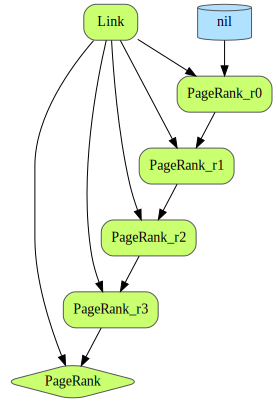

Running predicate: Link
Running predicate: PageRank_r0
Running predicate: PageRank_r1
Running predicate: PageRank_r2
Running predicate: PageRank_r3
Running predicate: PageRank


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following table is stored at PageRank variable.


col0  logica_value
0    a         5.375
1    b         4.625
2    c         4.250
3    d         7.000
4    e         1.000
5    f         1.000

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [17]:
%%logica PageRank

@Engine("sqlite");
@AttachDatabase("logica", ":memory:");
@Dataset("logica");

@Ground(Link);
Link("a", "b");
Link("b", "c");
Link("c", "d");
Link("e", "d");
Link("d", "a");
Link("f", "d");

@Recursive(PageRank, 4);                                                                                                                                                                                                                                                                     
Vertex(a) :- Link(x, a) | Link(a, x);                                                                                                               
Degree(a) += 1 :- Link(a, x);                                                                                                                       
@Ground(PageRank);
PageRank(a) += 1.0 :- Vertex(a);                                                                                                                    
PageRank(a) += 0.5 * PageRank(b) / Degree(b) :-                                                                                                     
  Link(b, a);                                                                                                                                       

